# EDA on the TMDB 5000 movies dataset

## Table of content:
* [Data wrangling:](#DATA-WRANGLING:)
    * [Libraries](#Importing-libraries:)
    * [Data](#IMPORTING-DATA:)
    * [Functions](#FUNCTIONS:)
    * [Data preparation](#DATA-PREPARATION:)


* [Data Analysis:](#DATA-ANALYSIS:)
    * [Correlation between the variables](#Correlation-between-the-variables:)
    * [Movies focus](#Movies-focus:)
    * [Genres focus](#Genres-focus:)
    * [Cast focus](#Cast-focus:)
    * [Production companies focus](#Production-companies-focus:)

# DATA WRANGLING:

### IMPORTING LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTING DATA:

data from kaggle: https://www.kaggle.com/datasets/deniskiprono/tmdb-5000-movies

In [2]:
movies = pd.read_csv(r"./data_tmdb/tmdb-movies.csv")

In [3]:
movies.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


budget_adj and revenue_adj can't be coming from TMDB (comment on their forum). As it has been added a postiori by someone, I won't use those data.
Popularity: how do they get that number?

### FUNCTIONS:

In [4]:
def str_to_list(lista):
    """
    Each cell is a single containing different informations seperated by a |. It will split the string by this seperator and return a list.
    
    argument:
        -lista: list that contains the names of the columns where you need to split the strings
        
    It will return the dataframe. In the choosen columns, the strings are replaced by a list where each variable was seperated by the | in the string.
    """
    for i in lista:
        movies[i] = movies[i].str.split(pat="|")
    
    return movies

In [5]:
def convert_to_million(lista):
    """
    Convert the value in Millions (of $) to bring a better visibility on this variable(s).
    
    argument:
     - lista: list that contains the names of the columns you to convert the numerical value in millions
    
    It will return the dataframe with the values in millions for the columns included in the argument lista.
    """
    for i in lista:
        movies[i] = round(movies[i]/1000000,2)
        
        movies.rename(columns={i:i+"_(M$)"}, inplace=True)
        
    return movies

In [6]:
def Top10(df, var):
    
    """
    It display the movies ranked by the column of your choise. Only one column (of numerical value) has to be choosen.
    
    Argument:
    -var: the name of the column by which the movies will be ranked
    
    It will return a barplot with the highest 10 movies ranked by the variable you have choosen
    
    """
    sns.barplot(data=df.sort_values(by=var,ascending=False).head(10), y="original_title", x=var)
    plt.show()

In [7]:
def list_unique_values(col):
    """
    It creates a list of unique value of the element that are contained in the list of the choosen columns. Each value of the column is a list of elements.
    
    Argument:
    -col: the name of the column on which you want to apply the function
    
    It will return a list of unique values
    """
    list_unique_values = []
    
    for m in movies[col]:
        for n in m:

            if n not in list_unique_values:
                list_unique_values.append(n)

    return (list_unique_values)

### DATA PREPARATION:

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Dropping the columns that we won't use:

In [9]:
movies=movies.drop(columns=["id","imdb_id","homepage","tagline","keywords","overview","release_date","budget_adj","revenue_adj"])

duplicates?

In [10]:
movies.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [11]:
movies=movies.drop_duplicates()

Converting to datetime the year of release column and keeping only the years:

In [12]:
movies["release_year"]=pd.to_datetime(movies["release_year"],format='%Y').dt.year

Is there some missing values? We delete the rows with missings values

In [13]:
movies.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [14]:
movies=movies.dropna()

For the columns Cast, genres and production_companies, we transform every item into a list

In [15]:
str_to_list(["cast","genres","production_companies"])

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,"[Michael Hynson, Robert August, Lord 'Tally Ho...",Bruce Brown,95,[Documentary],[Bruce Brown Films],11,7.4,1966
10862,0.065543,0,0,Grand Prix,"[James Garner, Eva Marie Saint, Yves Montand, ...",John Frankenheimer,176,"[Action, Adventure, Drama]","[Cherokee Productions, Joel Productions, Dougl...",20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,"[Innokentiy Smoktunovskiy, Oleg Efremov, Georg...",Eldar Ryazanov,94,"[Mystery, Comedy]",[Mosfilm],11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?","[Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...",Woody Allen,80,"[Action, Comedy]",[Benedict Pictures Corp.],22,5.4,1966


Withdrawing the rows which are documentary and Music:

In [16]:
mask_music=movies["genres"].str.contains("Music",regex=False)==False
mask_doc=movies["genres"].str.contains("Documentary",regex=False)==False

In [17]:
movies = movies[mask_music][mask_doc]

C:\Users\lauja\AppData\Local\Temp\ipykernel_6796\2833001897.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies = movies[mask_music][mask_doc]


We create a column profit:

In [18]:
movies["profit"]=movies["revenue"]-movies["budget"]

We show the budget, revenue and Profit in millions and adjust the column's names:

In [19]:
convert_to_million(["budget","revenue", "profit"])

,popularity,budget_(M$),revenue_(M$),original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit_(M$)
0,32.985763,150.00,1513.53,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1363.53
1,28.419936,150.00,378.44,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,228.44
2,13.112507,110.00,295.24,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,185.24
3,11.173104,200.00,2068.18,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,1868.18
4,9.335014,190.00,1506.25,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,1316.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,0.087034,0.00,0.00,Carry On Screaming!,"[Kenneth Williams, Jim Dale, Harry H. Corbett,...",Gerald Thomas,87,[Comedy],"[Peter Rogers Productions, Anglo-Amalgamated F...",13,7.0,1966,0.00
10862,0.065543,0.00,0.00,Grand Prix,"[James Garner, Eva Marie Saint, Yves Montand, ...",John Frankenheimer,176,"[Action, Adventure, Drama]","[Cherokee Productions, Joel Productions, Dougl...",20,5.7,1966,0.00
10863,0.065141,0.00,0.00,Beregis Avtomobilya,"[Innokentiy Smoktunovskiy, Oleg Efremov, Georg...",Eldar Ryazanov,94,"[Mystery, Comedy]",[Mosfilm],11,6.5,1966,0.00
10864,0.064317,0.00,0.00,"What's Up, Tiger Lily?","[Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...",Woody Allen,80,"[Action, Comedy]",[Benedict Pictures Corp.],22,5.4,1966,0.00


# DATA ANALYSIS:

## Correlation between the variables:

According to the correlation matrix, we can see that the different variables doesn't have a meaningfull impact on the reviews (the vote average).

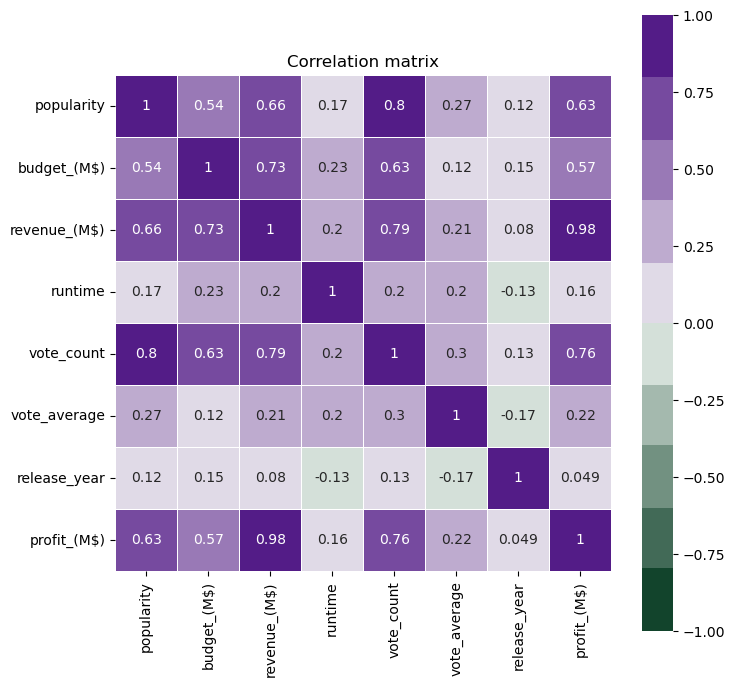

In [20]:
plt.figure(figsize=(8,8))

ax = sns.heatmap(movies[['popularity', 'budget_(M$)', 'revenue_(M$)', 'runtime', 'vote_count', 'vote_average', 'release_year','profit_(M$)']].corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

ax.set_title('Correlation matrix');

On the other hand, we can notice a high correlation between popularity and the number of vote, the revenue and the budget and the number of vote and the revenue, number vote and profit, and profit and revenue.

A more popular movie will receive more votes and as more people are watching those movies, they get more incomes and will have higher profits.  
Movies with biggest budgest will have more revenue. The more revenue you have, the more profit it will generates.

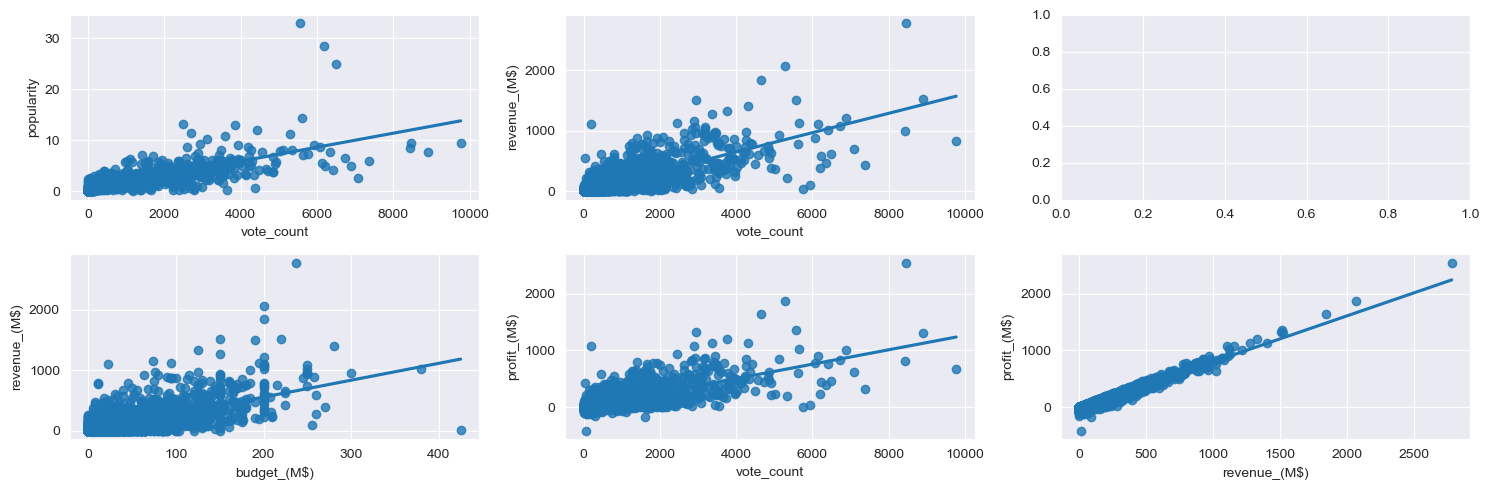

In [21]:
sns.set_style("darkgrid")
fig, ax =plt.subplots(2,3, figsize=(15,5))

ax1= sns.regplot(data=movies, y= 'popularity', x='vote_count', ci=None, ax=ax[0,0])
ax2= sns.regplot(data=movies, y= 'revenue_(M$)', x='vote_count', ci=None, ax=ax[0,1])
ax3= sns.regplot(data=movies, y= 'revenue_(M$)', x='budget_(M$)',ci=None, ax=ax[1,0])
ax4= sns.regplot(data=movies, y= 'profit_(M$)', x='vote_count',ci=None, ax=ax[1,1])
ax5= sns.regplot(data=movies, y= 'profit_(M$)', x='revenue_(M$)',ci=None, ax=ax[1,2]);

fig.tight_layout()
plt.show()

## Movies focus:

### What are the movies with the  best review, the biggest budgets and biggest benefits?

In [22]:
"Filter to keep the Movies with a significant amount of votes:"

movies["vote_count"].describe()[["mean","50%"]]

mean    248.499127
50%      47.000000
Name: vote_count, dtype: float64

In [23]:
"we keep the movies that have a number of vote higher than the average"

movies_votes=movies[movies["vote_count"]>movies["vote_count"].mean()]

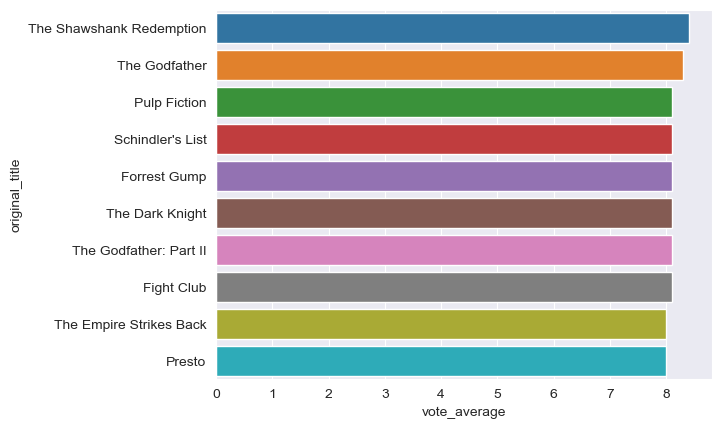

In [24]:
Top10(movies_votes,"vote_average")

### What are the movies with the biggest budgets?

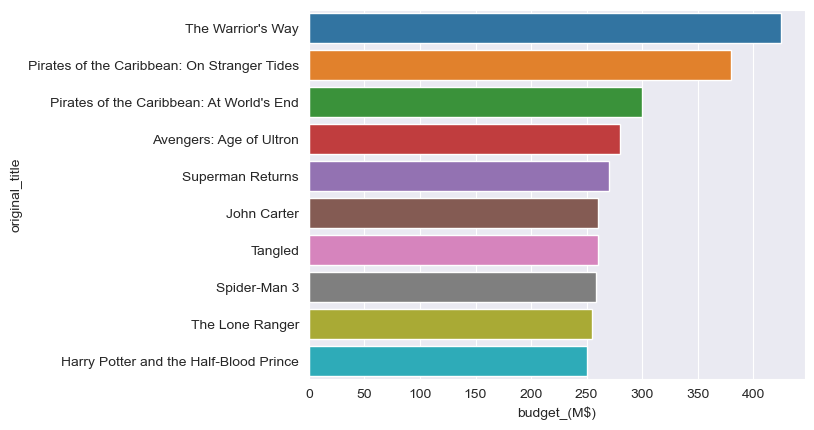

In [25]:
Top10(movies,"budget_(M$)")

### What are the movies with the biggest benefits?

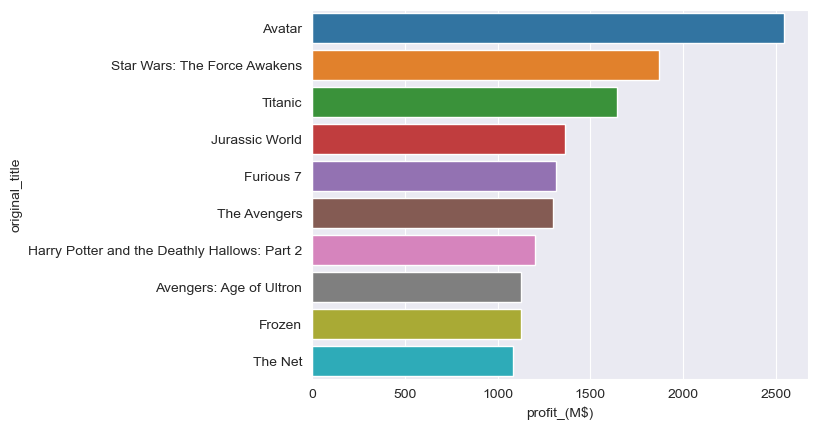

In [26]:
Top10(movies,"profit_(M$)")

## Genres focus:

### What has been the evolution of genres over the years?

In [27]:
genres_list = list_unique_values("genres")

In [28]:
genres_df = pd.DataFrame()
year = []
genres = []
genres_counting = []

for y in movies["release_year"].unique():
    
    genre_year =[]
    
    for genre in movies[movies["release_year"]==y]["genres"]:
        for n in genre:

            if n not in genre_year:
                genre_year.append(n)
    
    for g in genre_year:
        year.append(y)
        genres.append(g)
        
        value = movies[movies["release_year"]==y]["genres"].str.contains(g,regex=False).value_counts().loc[True]
        genres_counting.append(value)
        
genres_df["Year"]=year
genres_df["Genres"]=genres
genres_df["Nb_movies"]=genres_counting

Drama is clearly the genres that is dominant in the movies industry. Comedy has been very present during the years but it has been decreasing during the last decades. On the other hand, we can notice an increase of the number of Thriller.

<AxesSubplot: xlabel='Year', ylabel='Nb_movies'>

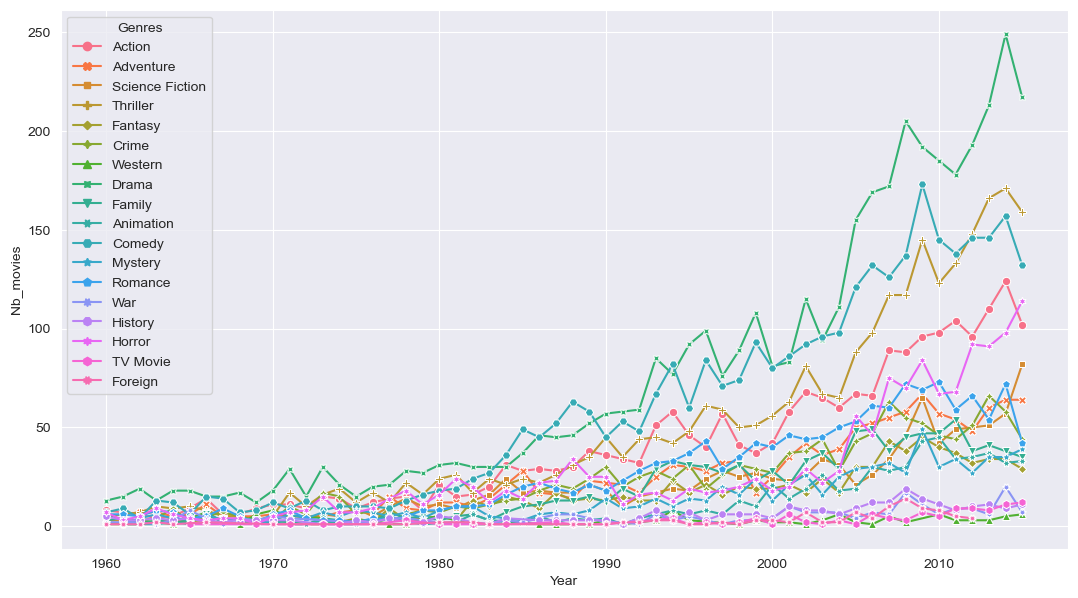

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,7))

sns.lineplot(data=genres_df, x="Year", y="Nb_movies", hue="Genres", style="Genres",markers=True, dashes=False)

### What has been the evolution of the number of movies produced?
The number of movies has been growing exponentially all over the years.

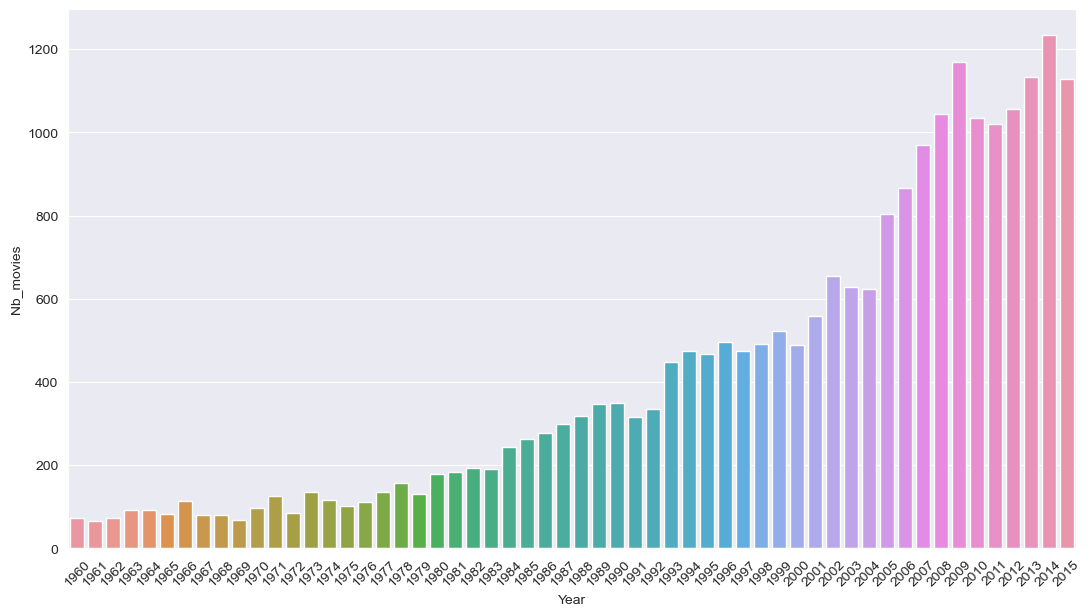

In [30]:
plt.figure(figsize=(13,7))
sns.barplot(data=genres_df.groupby(["Year"]).sum(),x=genres_df.groupby(["Year"]).sum().index, y="Nb_movies")
plt.xticks(rotation=45)
plt.show()

## Cast focus:

### Which actors appears in the most movies?

In [31]:
cast_list = list_unique_values("cast")

In [32]:
cast_df = pd.DataFrame()
year = []
cast= []
cast_counting = []

for y in movies["release_year"].unique():
    
    cast_year =[]
    
    for c in movies[movies["release_year"]==y]["cast"]:
        for n in c:

            if n not in cast_year:
                cast_year.append(n)  
                
    for g in cast_year:
        year.append(y)
        cast.append(g)
        
        value = movies[movies["release_year"]==y]["cast"].str.contains(g,regex=False).value_counts().loc[True]
        cast_counting.append(value)
        
cast_df["cast"]=cast
cast_df["Nb_movies"]=cast_counting
cast_df

,cast,Nb_movies
0,Chris Pratt,1
1,Bryce Dallas Howard,1
2,Irrfan Khan,1
3,Vincent D'Onofrio,1
4,Nick Robinson,1
...,...,...
38265,Harold P. Warren,1
38266,Tom Neyman,1
38267,John Reynolds,1
38268,Diane Mahree,1


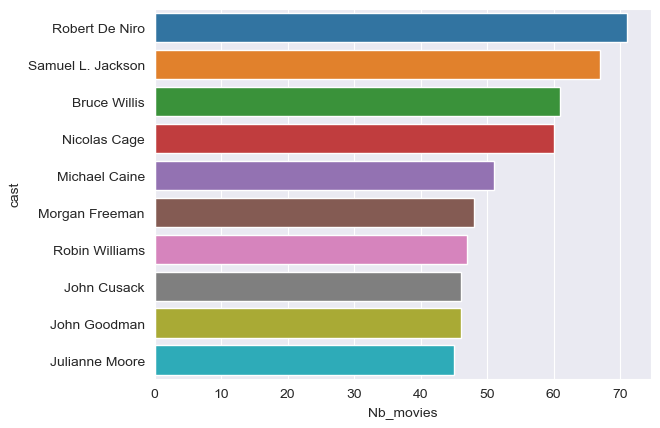

In [33]:
Ranking_actors = cast_df.groupby(["cast"]).sum().sort_values(by="Nb_movies",ascending=False).head(10).reset_index()

"""plt.figure(figsize=(13,7))"""
sns.barplot(data=Ranking_actors, y="cast", x="Nb_movies")

plt.show()

### Which directors have produced the most movies?

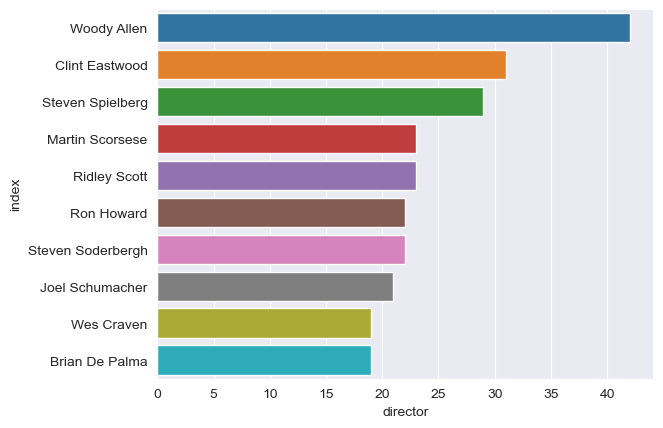

In [34]:
directors_movies = movies["director"].value_counts().head(10).reset_index()

"""plt.figure(figsize=(13,7))"""
sns.barplot(data=directors_movies, y="index", x="director")

plt.show()

### Which directors have generated the most accumulated benefits?

In [35]:
movies["director"].value_counts().describe()

count    4193.000000
mean        2.186024
std         2.540742
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        42.000000
Name: director, dtype: float64

We will keep only the directors that have more than 2 movies:

In [36]:
mask=movies["director"].value_counts()>2

In [37]:
movies["director"].value_counts()[mask].index

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Martin Scorsese',
       'Ridley Scott', 'Ron Howard', 'Steven Soderbergh', 'Joel Schumacher',
       'Wes Craven', 'Brian De Palma',
       ...
       'Bille Woodruff', 'Jonathan Glazer', 'Tony Bill', 'Joss Whedon',
       'Brad Peyton', 'Billy Ray', 'Mario Van Peebles', 'Joe Lynch',
       'Robert Townsend', 'Gina Prince-Bythewood'],
      dtype='object', length=941)

In [38]:
mask_directors=movies["director"].isin(movies["director"].value_counts()[mask].index)

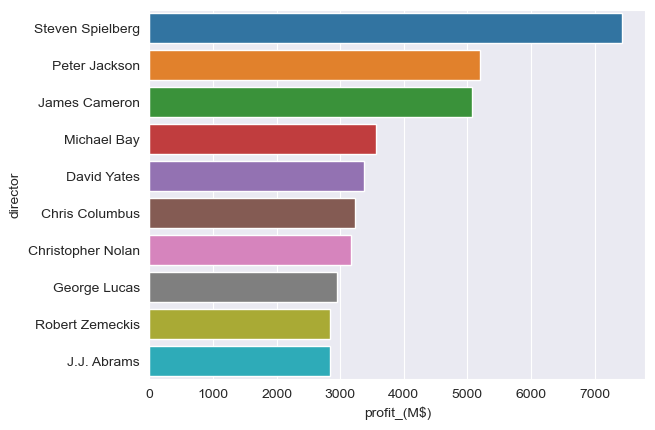

In [39]:
directors_profits = movies[mask_directors].groupby("director")["profit_(M$)"].sum().sort_values(ascending=False).head(10).reset_index()

"""plt.figure(figsize=(13,7))"""
sns.barplot(data=directors_profits, y="director", x="profit_(M$)")

plt.show()

## Production companies focus:
### Which companies have produced the most movies?

In [40]:
production_companies_list = list_unique_values("production_companies")

In [41]:
prod_df = pd.DataFrame()
year = []
production_companies= []
prod_counting = []

for y in movies["release_year"].unique():
    
    prod_year =[]
    
    for company in movies[movies["release_year"]==y]["production_companies"]:
        for n in company:

            if n not in prod_year:
                prod_year.append(n)
    
    for g in prod_year:
        year.append(y)
        production_companies.append(g)
        
        value = movies[movies["release_year"]==y]["production_companies"].str.contains(g,regex=False).value_counts().loc[True]
        prod_counting.append(value)
        
"""prod_df["Year"]=year"""
prod_df["production_companies"]=production_companies
prod_df["Nb_movies"]=prod_counting

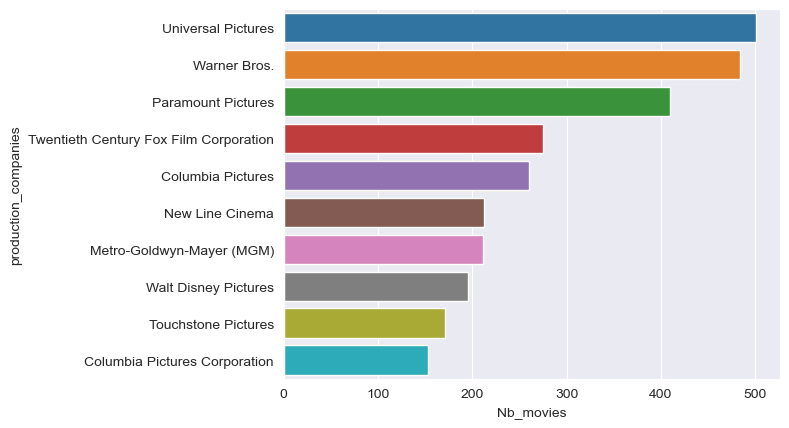

In [42]:
Ranking_production = prod_df.groupby(["production_companies"]).sum().sort_values(by=["Nb_movies"],ascending=False).head(10).reset_index()

"""plt.figure(figsize=(13,7))"""
sns.barplot(data=Ranking_production, y="production_companies", x="Nb_movies")

plt.show()